**About Dataset**

This is data that confirmed the grade of performance with age and some exercise performance data.

**columns**

* age : 20 ~64
* gender : F,M
* height_cm : (If you want to convert to feet, divide by 30.48)
* weight_kg
* body fat_%
* diastolic : diastolic blood pressure (min)
* systolic : systolic blood pressure (min)
* gripForce
* sit and bend forward_cm
* sit-ups counts
* broad jump_cm
* class : A,B,C,D ( A: best) / stratified






In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.4 MB/s 
     |████████████████████████████████| 17.0 MB 48.8 MB/s 
     |████████████████████████████████| 167 kB 54.6 MB/s 
     |████████████████████████████████| 3.3 MB 38.7 MB/s 
     |████████████████████████████████| 141 kB 58.1 MB/s 
     |████████████████████████████████| 1.7 MB 51.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 325 kB 62.9 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 636 kB 66.1 MB/s 
     |████████████████████████████████| 2.0 MB 54.2 MB/s 
     |████████████████████████████████| 6.8 MB 49.0 MB/s 
     |████████████████████████████████| 4.8 MB 46.2 MB/s 
     |████████████████████████████████

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
import pandas as pd
import numpy as np

In [6]:
#import the dataset
dataset = pd.read_csv('bodyPerformance.csv')

In [7]:
dataset.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [8]:
# check the shape of the data
dataset.shape

(13393, 12)

In [9]:
#statistical inference about the data
dataset.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

In [10]:
#check the missing values
print(dataset.isnull().sum())

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [11]:
#get the data type of each variable
dataset.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

There are one categorical variable instead of target variable. therefore we have to do a categorical encoding

In [12]:
#column names
dataset.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

age                           AxesSubplot(0.125,0.816017;0.168478x0.0639831)
height_cm                  AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
weight_kg                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
body fat_%                 AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
diastolic                     AxesSubplot(0.125,0.739237;0.168478x0.0639831)
systolic                   AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
gripForce                  AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
sit and bend forward_cm    AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
sit-ups counts                AxesSubplot(0.125,0.662458;0.168478x0.0639831)
broad jump_cm              AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
dtype: object

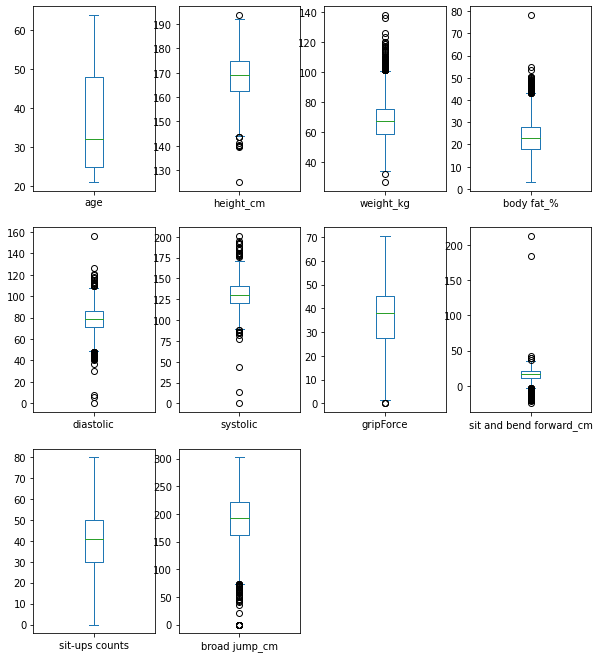

In [13]:
#outiler detection
dataset[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class']].plot(kind="box", subplots=True, layout=(10,4), figsize=(10,40))

There are outliers in the variables. therefore we have to handle the outliers

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.889, p =0.000

Distribution of age variable is not normal


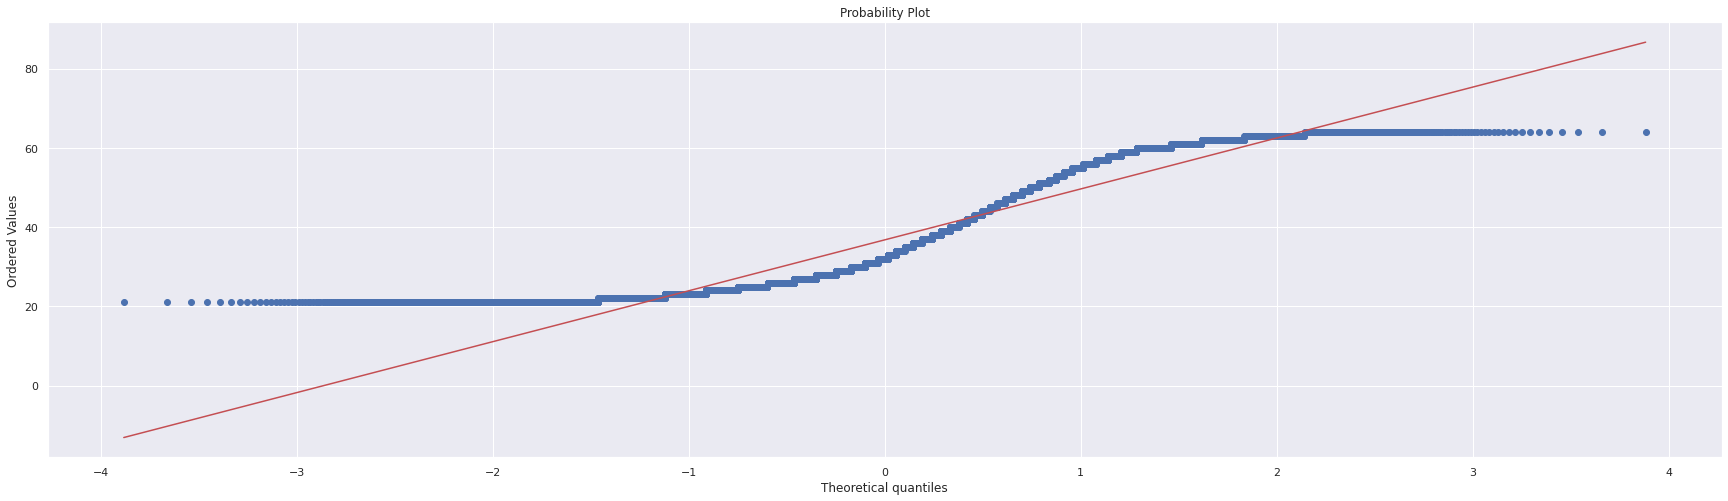

In [23]:
# check the normality of the variables
from scipy.stats import shapiro
import scipy.stats as stats
import pylab

stat , p = shapiro(dataset['age'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of bhr variable is normal")
else:
    print("Distribution of age variable is not normal")
    
stats.probplot(dataset['age'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.993, p =0.000

Distribution of age variable is not normal


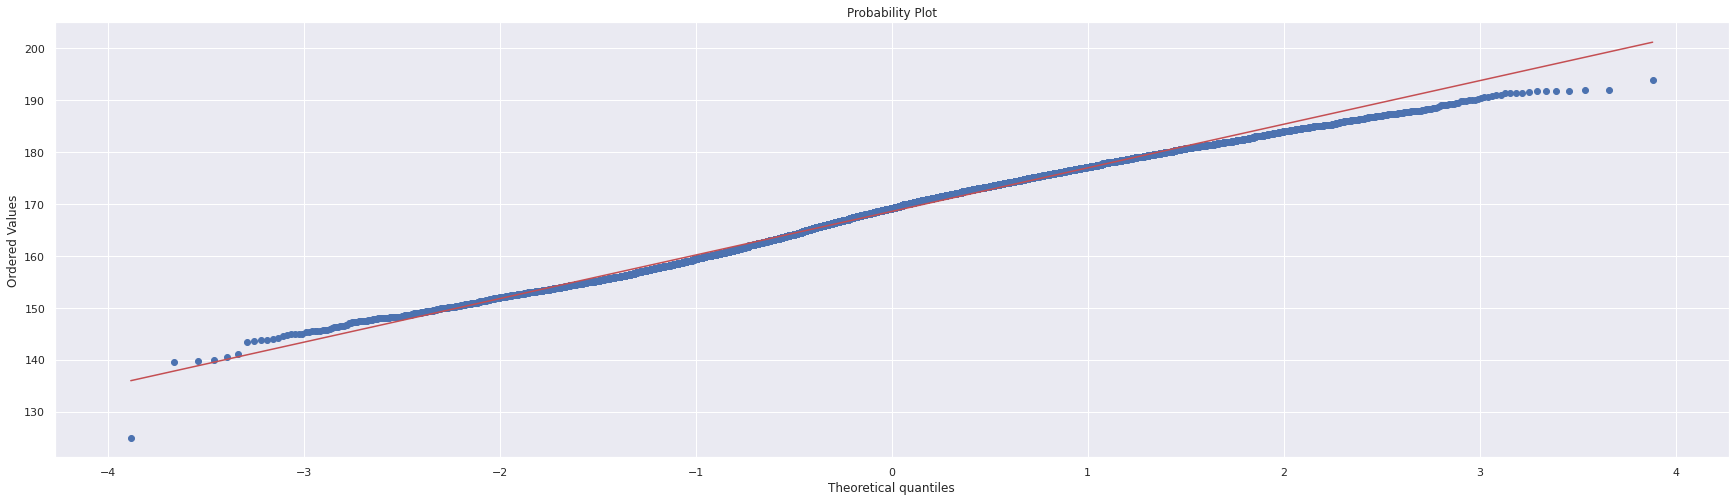

In [24]:
stat , p = shapiro(dataset['height_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of age variable is normal")
else:
    print("Distribution of age variable is not normal")
    
stats.probplot(dataset['height_cm'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.989, p =0.000

Distribution of weight_kg variable is not normal


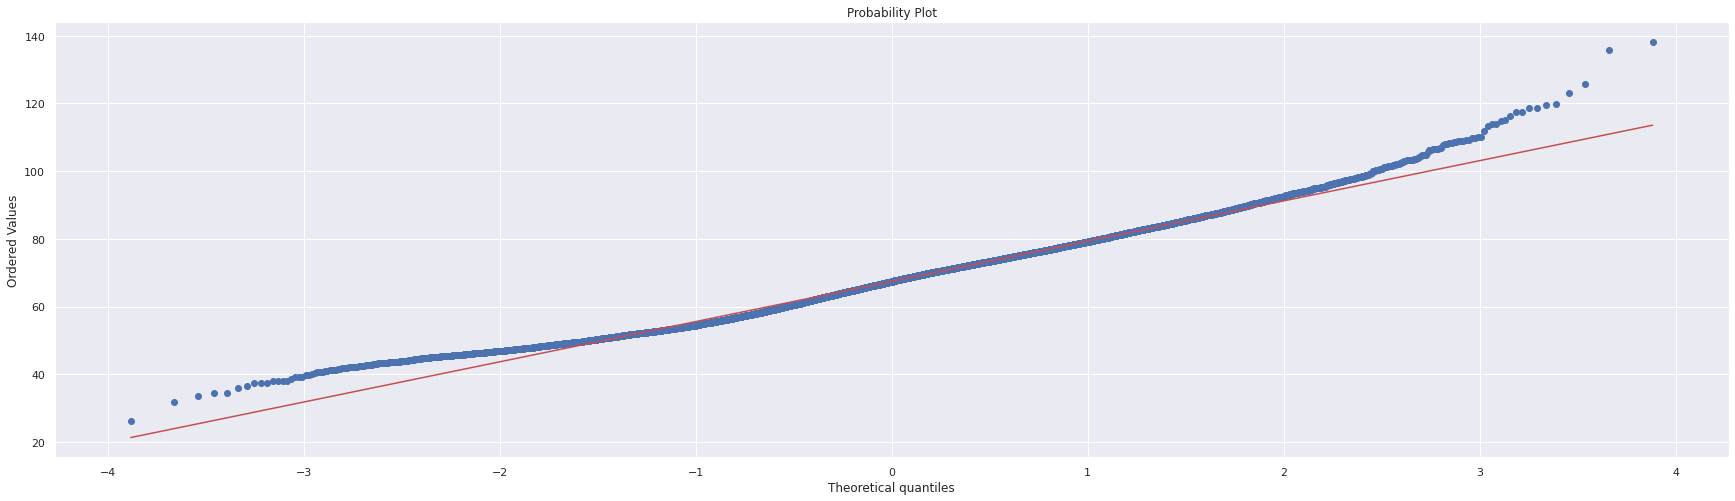

In [25]:
stat , p = shapiro(dataset['weight_kg'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of weight_kg variable is normal")
else:
    print("Distribution of weight_kg variable is not normal")
    
stats.probplot(dataset['weight_kg'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.991, p =0.000

Distribution of body fat_% variable is not normal


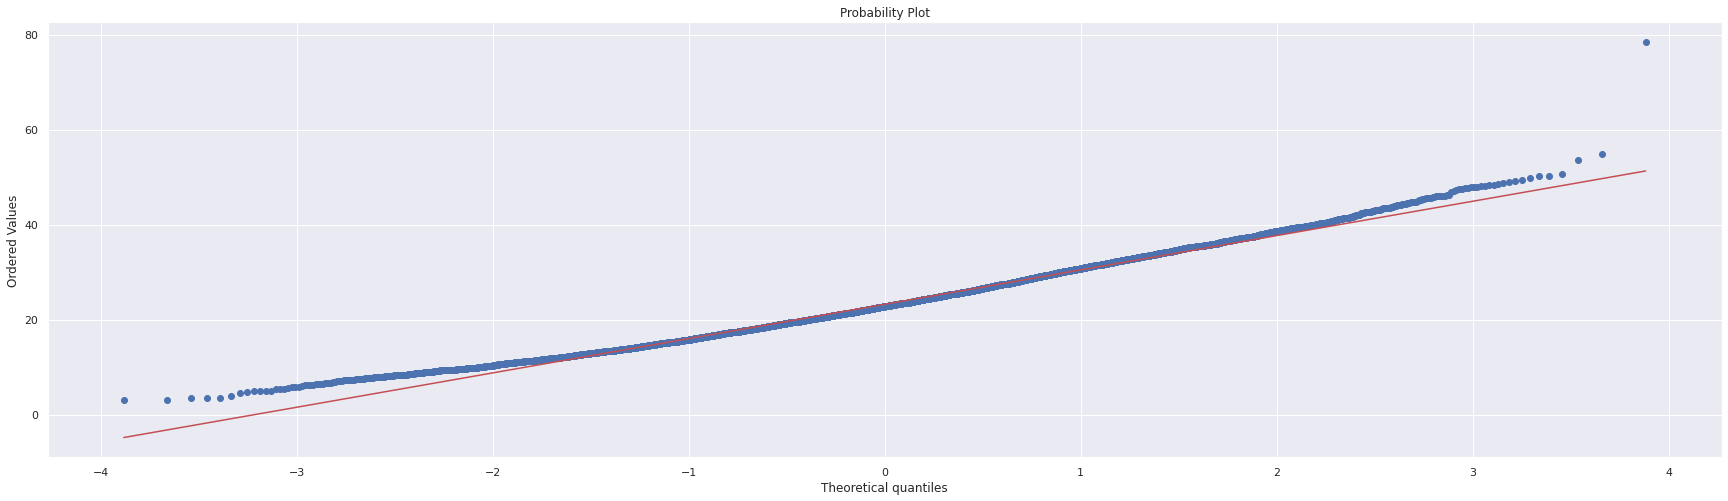

In [26]:

stat , p = shapiro(dataset['body fat_%'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of body fat_% variable is normal")
else:
    print("Distribution of body fat_% variable is not normal")
    
stats.probplot(dataset['body fat_%'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.990, p =0.000

Distribution of diastolic variable is not normal


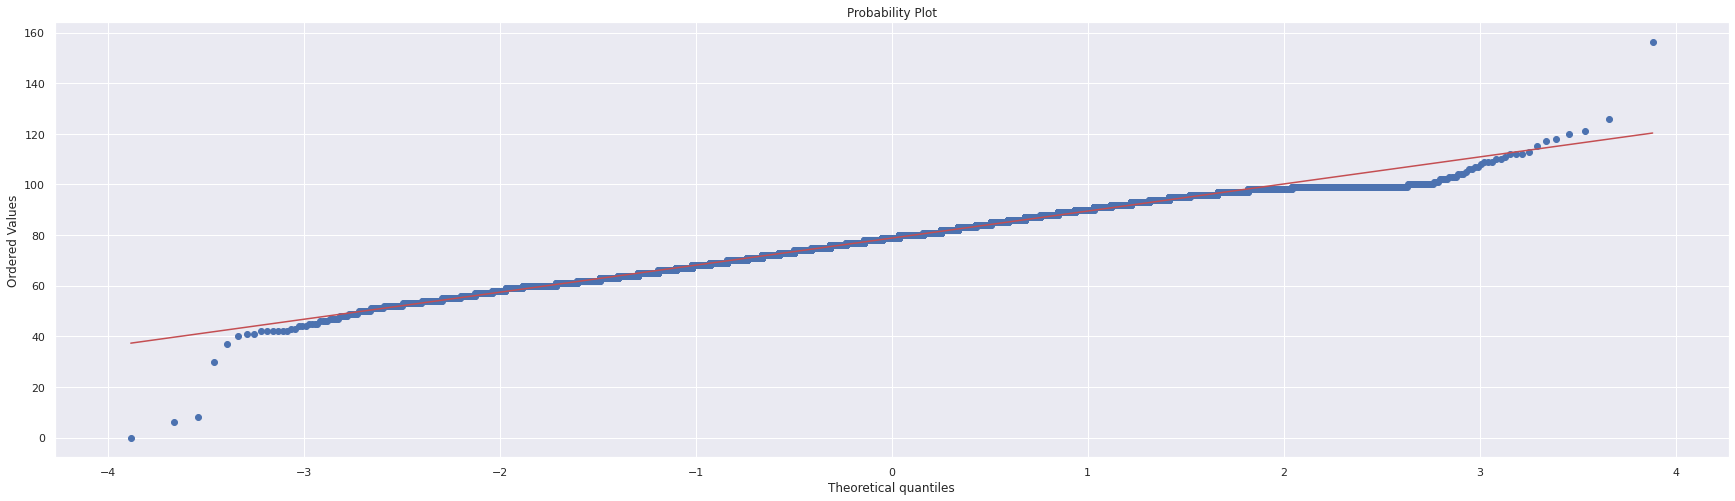

In [28]:
stat , p = shapiro(dataset['diastolic'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of diastolic variable is normal")
else:
    print("Distribution of diastolic variable is not normal")
    
stats.probplot(dataset['diastolic'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.989, p =0.000

Distribution of systolic variable is not normal


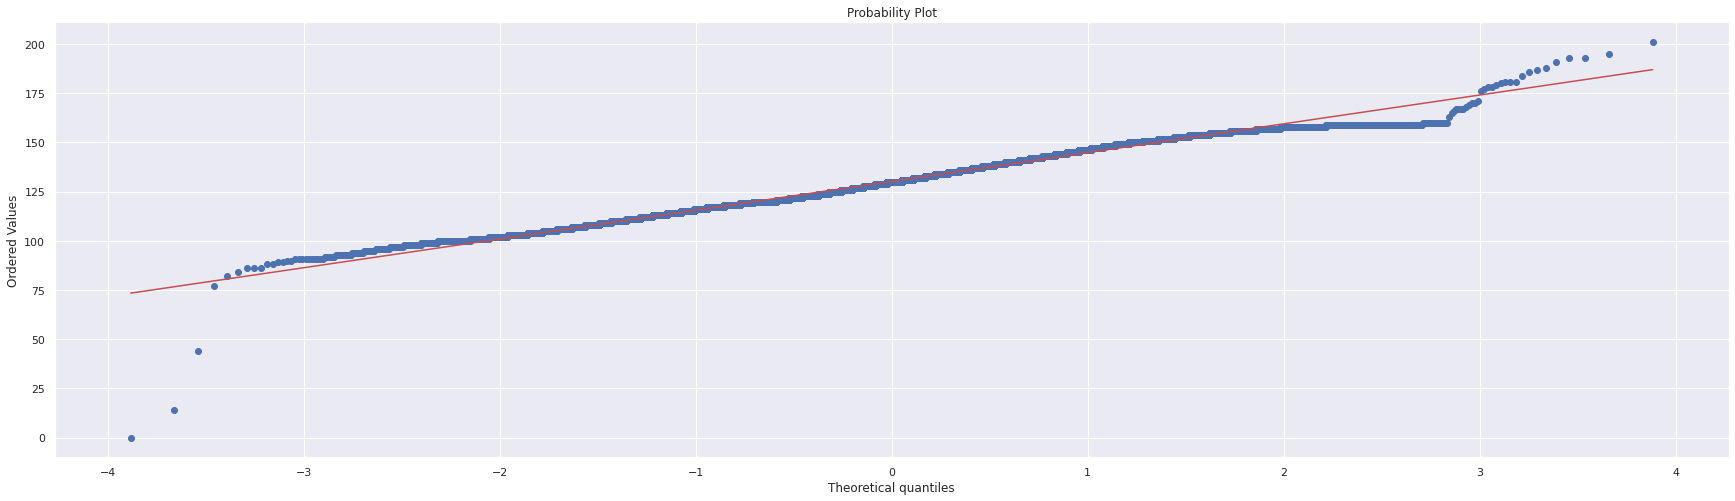

In [29]:
stat , p = shapiro(dataset['systolic'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of systolic variable is normal")
else:
    print("Distribution of systolic variable is not normal")
    
stats.probplot(dataset['systolic'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.980, p =0.000

Distribution of gripForce variable is not normal


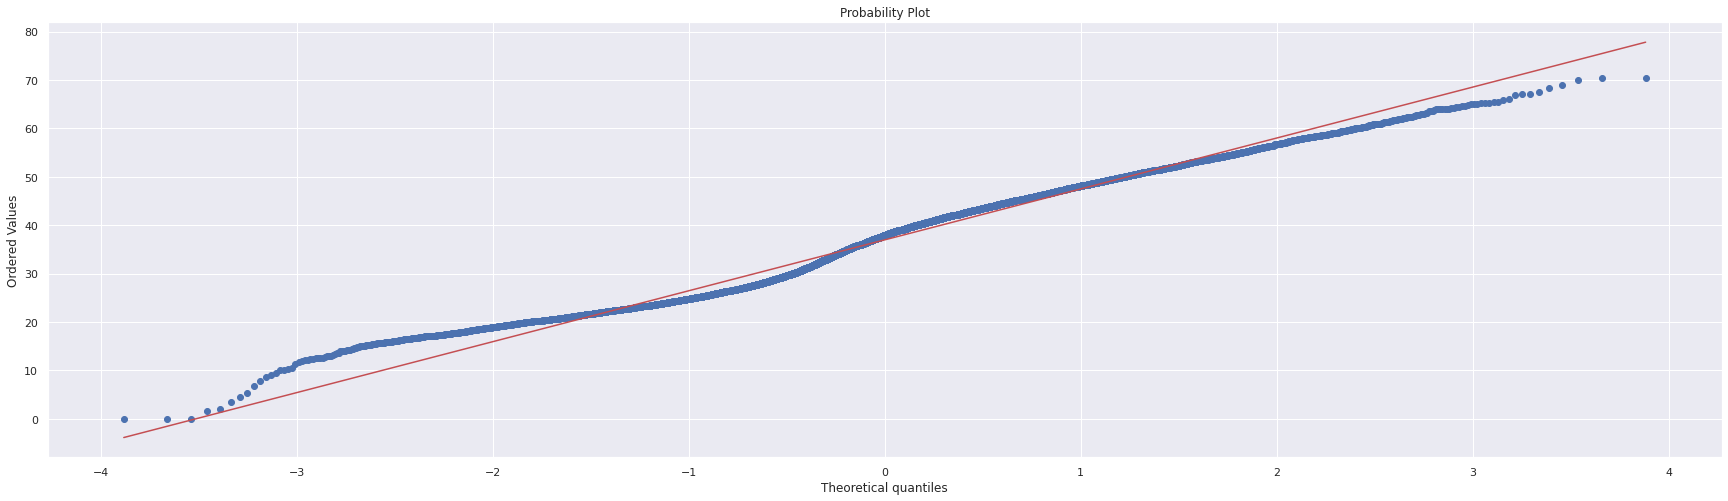

In [30]:
stat , p = shapiro(dataset['gripForce'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of gripForce variable is normal")
else:
    print("Distribution of gripForce variable is not normal")
    
stats.probplot(dataset['gripForce'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.917, p =0.000

Distribution of sit and bend forward_cm variable is not normal


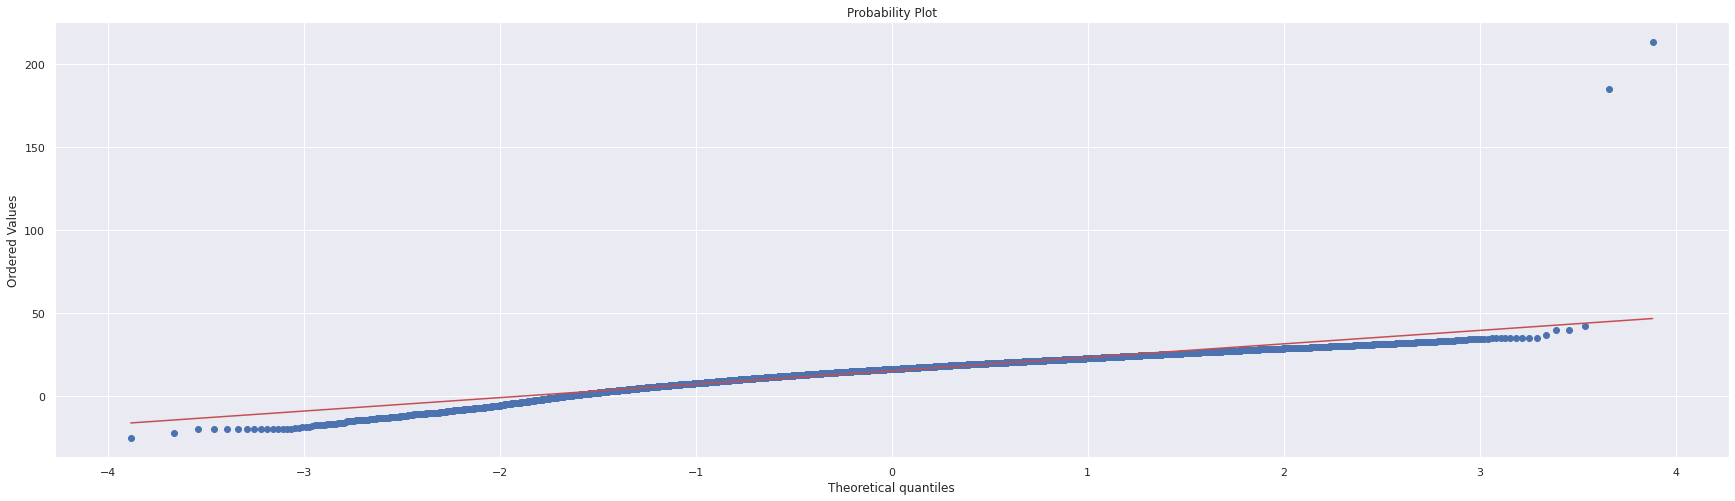

In [31]:
stat , p = shapiro(dataset['sit and bend forward_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of sit and bend forward_cm variable is normal")
else:
    print("Distribution of sit and bend forward_cm variable is not normal")
    
stats.probplot(dataset['sit and bend forward_cm'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.981, p =0.000

Distribution of sit-ups counts variable is not normal


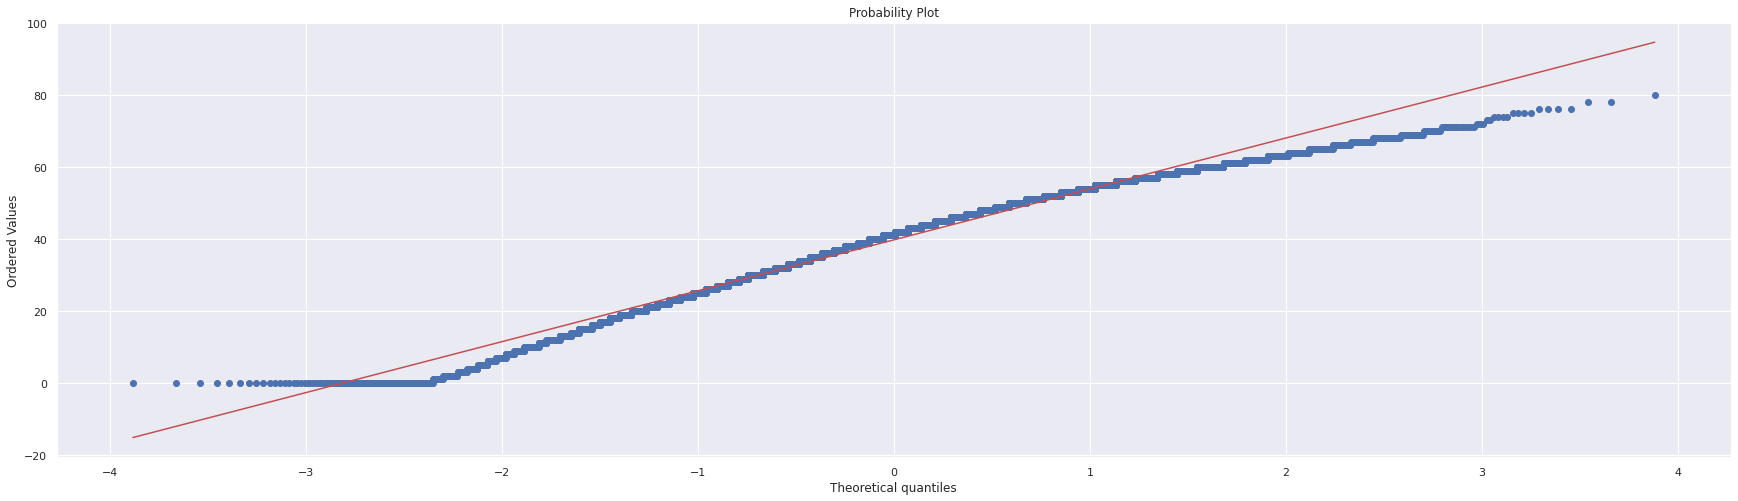

In [32]:
stat , p = shapiro(dataset['sit-ups counts'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of sit-ups counts variable is normal")
else:
    print("Distribution of sit-ups counts variable is not normal")
    
stats.probplot(dataset['sit-ups counts'],dist = "norm" , plot = pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat = 0.984, p =0.000

Distribution of broad jump_cm variable is not normal


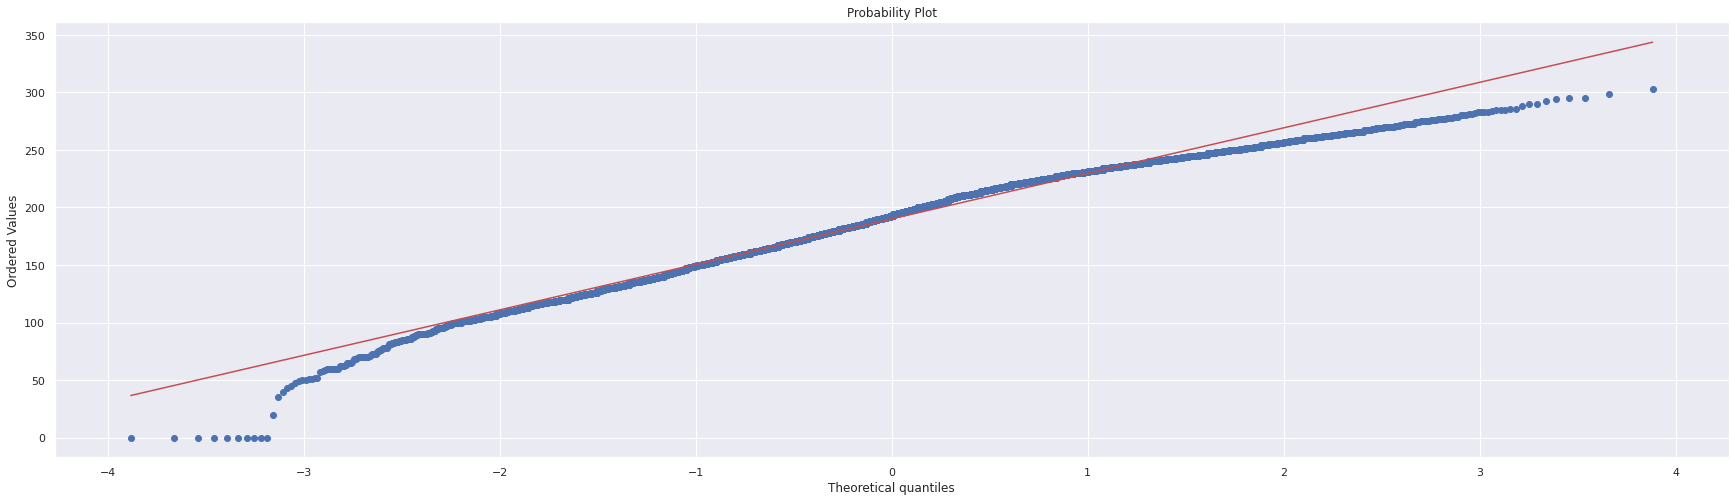

In [33]:
stat , p = shapiro(dataset['broad jump_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of broad jump_cm variable is normal")
else:
    print("Distribution of broad jump_cm variable is not normal")
    
stats.probplot(dataset['broad jump_cm'],dist = "norm" , plot = pylab)
pylab.show()

In [14]:

# Using groupby() and count()
dataset.groupby(['class'])['class'].count()



class
A    3348
B    3347
C    3349
D    3349
Name: class, dtype: int64

Levels are not imbalanced

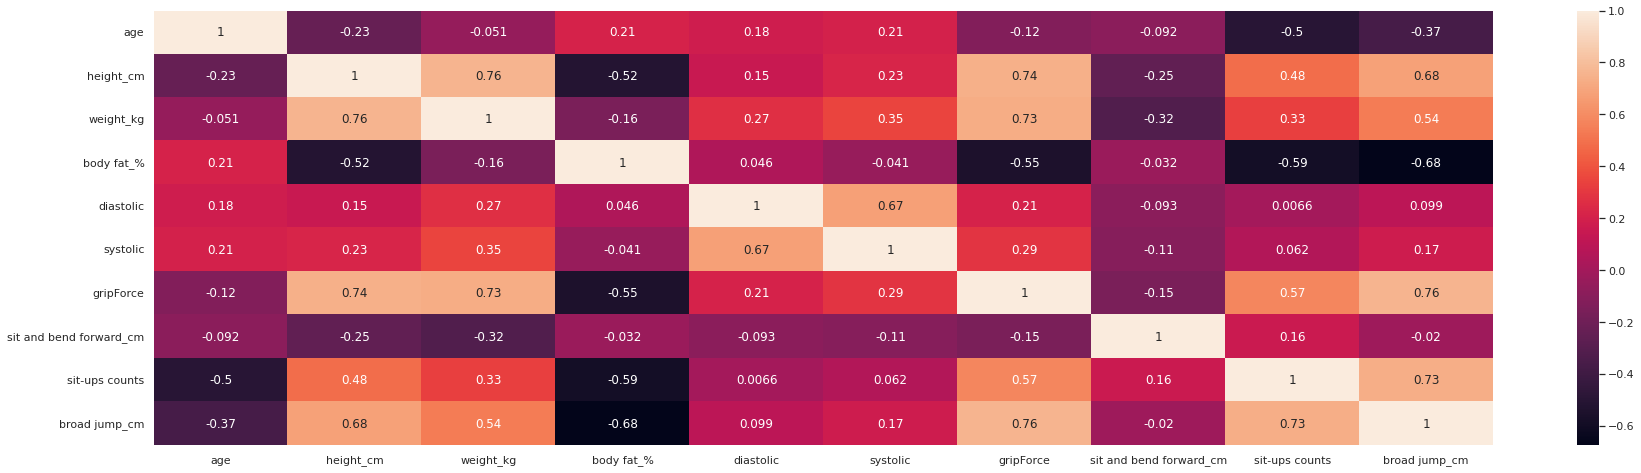

In [15]:
#find the correlation between each variabl
import seaborn as sns
corelation = dataset[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class']].corr(method = 'spearman')
sns.set(rc = {'figure.figsize':(30,8)})
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [16]:
#find the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
X = dataset[['age','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature         VIF
0                      age   13.418620
1                height_cm  203.370883
2                weight_kg  106.434547
3               body fat_%   24.581319
4                diastolic  102.847284
5                 systolic  159.551567
6                gripForce   55.944910
7  sit and bend forward_cm    5.120642
8           sit-ups counts   26.502978
9            broad jump_cm   99.586989


There is multicollinearity. Therefore we have to handle it

# **AutoML part**

In [21]:
#split the dataset
data = dataset.sample(frac=0.8, random_state=786) #80% for the training data 
data_unseen = dataset.drop(data.index) #test data

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (10714, 12)
Unseen Data For Predictions: (2679, 12)


In [39]:
 !pip3 install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
#setting up the environment
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'class', session_id=123, remove_outliers = True, 
                    outliers_threshold = 0.05, normalize = True, normalize_method = "robust",
                    transformation = True, transformation_method = 'yeo-johnson',
                     remove_multicollinearity = True,
                    multicollinearity_threshold = 0.9) 

Description                   Value
0                               session_id                     123
1                                   Target                   class
2                              Target Type              Multiclass
3                            Label Encoded  A: 0, B: 1, C: 2, D: 3
4                            Original Data             (10714, 12)
5                           Missing Values                   False
6                         Numeric Features                      10
7                     Categorical Features                       1
8                         Ordinal Features                   False
9                High Cardinality Features                   False
10                 High Cardinality Method                    None
11                   Transformed Train Set              (7124, 11)
12                    Transformed Test Set              (3215, 11)
13                      Shuffle Train-Test                    True
14                     Stratify Train-Test                   False
15                          Fold Generator         StratifiedKFold
16                             Fold Number                      10
17                                CPU Jobs                      -1
18                                 Use GPU                   False
19                          Log Experiment                   False
20                         Experiment Name        clf-default-name
21                                     USI                    83ef
22                         Imputation Type                  simple
23          Iterative Imputation Iteration                    None
24                         Numeric Imputer                    mean
25      Iterative Imputation Numeric Model                    None
26                     Categorical Imputer                constant
27  Iterative Imputation Categorical Model                    None
28           Unknown Categoricals Handling          least_frequent
29                               Normalize                    True
30                        Normalize Method                  robust
31                          Transformation                    True
32                   Transformation Method             yeo-johnson
33                                     PCA                   False
34                              PCA Method                    None
35                          PCA Components                    None
36                     Ignore Low Variance                   False
37                     Combine Rare Levels                   False
38                    Rare Level Threshold                    None
39                         Numeric Binning                   False
40                         Remove Outliers                    True
41                      Outliers Threshold                    0.05
42                Remove Multicollinearity                    True
43             Multicollinearity Threshold                     0.9
44             Remove Perfect Collinearity                    True
45                              Clustering                   False
46                    Clustering Iteration                    None
47                     Polynomial Features                   False
48                       Polynomial Degree                    None
49                    Trignometry Features                   False
50                    Polynomial Threshold                    None
51                          Group Features                   False
52                       Feature Selection                   False
53                Feature Selection Method                 classic
54            Features Selection Threshold                    None
55                     Feature Interaction                   False
56                           Feature Ratio                   False
57                   Interaction Threshold                    None
58                           Fix Imbalance                   False
59         

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [42]:
#comparing the models and sort the algos according to F1
best = compare_models(sort = 'F1') #calculate values according to the 10 folds

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.7340  0.9125  0.7371  0.7400   
rf               Random Forest Classifier    0.7122  0.9012  0.7155  0.7169   
et                 Extra Trees Classifier    0.7019  0.8937  0.7058  0.7048   
gbc          Gradient Boosting Classifier    0.6975  0.8946  0.7011  0.7044   
qda       Quadratic Discriminant Analysis    0.6256  0.8491  0.6290  0.6360   
dt               Decision Tree Classifier    0.6238  0.7479  0.6282  0.6251   
lda          Linear Discriminant Analysis    0.5866  0.8255  0.5915  0.5886   
lr                    Logistic Regression    0.5882  0.8268  0.5935  0.5867   
ada                  Ada Boost Classifier    0.5834  0.7195  0.5854  0.5913   
knn                K Neighbors Classifier    0.5723  0.7989  0.5744  0.5976   
nb                            Naive Bayes    0.5392  0.7908  0.5451  0.5313   
svm                   SVM - Linear Kernel    0.5199  0.0000  0.5306  0.4814   
ridge                    Ridge Classifier    0.5147  0.0000  0.5283  0.5014   
dummy                    Dummy Classifier    0.2640  0.5000  0.2500  0.0697   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.7338  0.6448  0.6467     0.586  
rf        0.7123  0.6158  0.6171     1.434  
et        0.7007  0.6020  0.6036     0.897  
gbc       0.6969  0.5960  0.5983     4.870  
qda       0.6291  0.4998  0.5006     0.021  
dt        0.6240  0.4979  0.4981     0.091  
lda       0.5872  0.4482  0.4484     0.027  
lr        0.5869  0.4505  0.4507     0.257  
ada       0.5842  0.4432  0.4447     0.293  
knn       0.5727  0.4279  0.4328     0.205  
nb        0.5328  0.3859  0.3871     0.019  
svm       0.4772  0.3623  0.3749     0.187  
ridge     0.4409  0.3577  0.3898     0.025  
dummy     0.1103  0.0000  0.0000     0.014

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Let's take Light Gradient Boosting Machine, Random Forest Classifier, Extra Trees Classifier and Gradient Boosting Classifier for hyperparametric tuning because they have nearly eqaul F1 scores to 0.7

In [43]:
##Light Gradient Boosting Machine
#create the model
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7363  0.9216  0.7397  0.7370  0.7349  0.6480  0.6491
1       0.7083  0.9032  0.7122  0.7162  0.7095  0.6105  0.6121
2       0.7504  0.9209  0.7521  0.7576  0.7500  0.6665  0.6687
3       0.7097  0.8997  0.7122  0.7259  0.7122  0.6121  0.6152
4       0.7402  0.9137  0.7436  0.7419  0.7396  0.6531  0.6539
5       0.7374  0.9071  0.7411  0.7403  0.7360  0.6495  0.6513
6       0.7275  0.9099  0.7304  0.7335  0.7277  0.6361  0.6377
7       0.7458  0.9203  0.7492  0.7516  0.7463  0.6605  0.6618
8       0.7331  0.9147  0.7346  0.7433  0.7346  0.6433  0.6455
9       0.7514  0.9138  0.7558  0.7524  0.7470  0.6684  0.6717
Mean    0.7340  0.9125  0.7371  0.7400  0.7338  0.6448  0.6467
Std     0.0144  0.0071  0.0144  0.0119  0.0131  0.0192  0.0192

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [49]:
#tune the model
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7111  0.9075  0.7145  0.7105  0.7068  0.6143  0.6166
1       0.6718  0.8868  0.6760  0.6814  0.6734  0.5617  0.5634
2       0.7391  0.9103  0.7416  0.7459  0.7393  0.6516  0.6535
3       0.6928  0.8912  0.6959  0.7081  0.6950  0.5897  0.5926
4       0.7444  0.9086  0.7479  0.7472  0.7437  0.6587  0.6599
5       0.6952  0.8959  0.6979  0.7023  0.6952  0.5929  0.5948
6       0.7247  0.9072  0.7275  0.7306  0.7248  0.6323  0.6339
7       0.7191  0.9041  0.7231  0.7223  0.7175  0.6251  0.6271
8       0.7233  0.9046  0.7240  0.7353  0.7254  0.6301  0.6323
9       0.7163  0.9026  0.7200  0.7193  0.7135  0.6213  0.6240
Mean    0.7138  0.9019  0.7168  0.7203  0.7135  0.6178  0.6198
Std     0.0209  0.0075  0.0206  0.0195  0.0205  0.0280  0.0278

INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [44]:
##Random Forest Classifier
#create model
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7153  0.9115  0.7195  0.7140  0.7128  0.6201  0.6212
1       0.7027  0.8906  0.7069  0.7059  0.7028  0.6031  0.6039
2       0.7279  0.9079  0.7306  0.7300  0.7271  0.6367  0.6377
3       0.6985  0.8918  0.7009  0.7177  0.7026  0.5970  0.6000
4       0.7219  0.9031  0.7264  0.7209  0.7205  0.6289  0.6294
5       0.7037  0.8985  0.7071  0.7052  0.7021  0.6044  0.6058
6       0.7247  0.9036  0.7273  0.7333  0.7262  0.6323  0.6338
7       0.7177  0.9102  0.7205  0.7235  0.7184  0.6230  0.6243
8       0.7022  0.9001  0.7038  0.7099  0.7043  0.6021  0.6030
9       0.7079  0.8948  0.7120  0.7084  0.7061  0.6101  0.6114
Mean    0.7122  0.9012  0.7155  0.7169  0.7123  0.6158  0.6171
Std     0.0100  0.0070  0.0102  0.0094  0.0095  0.0135  0.0132

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [51]:
#tune model
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6087  0.8570  0.6171  0.5961  0.5918  0.4792  0.4854
1       0.6297  0.8534  0.6366  0.6303  0.6238  0.5062  0.5101
2       0.6438  0.8655  0.6499  0.6495  0.6364  0.5251  0.5313
3       0.6213  0.8560  0.6273  0.6171  0.6133  0.4953  0.4990
4       0.6461  0.8636  0.6526  0.6399  0.6376  0.5282  0.5315
5       0.6334  0.8621  0.6387  0.6373  0.6237  0.5111  0.5186
6       0.6489  0.8635  0.6548  0.6464  0.6407  0.5320  0.5364
7       0.6531  0.8700  0.6590  0.6687  0.6483  0.5375  0.5454
8       0.6292  0.8628  0.6341  0.6275  0.6228  0.5054  0.5085
9       0.6643  0.8636  0.6707  0.6657  0.6560  0.5527  0.5586
Mean    0.6379  0.8618  0.6441  0.6379  0.6294  0.5173  0.5225
Std     0.0156  0.0047  0.0153  0.0207  0.0176  0.0207  0.0211

INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [45]:
##Extra Trees Classifier
#create model
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7111  0.9041  0.7161  0.7104  0.7093  0.6145  0.6154
1       0.6830  0.8797  0.6876  0.6864  0.6820  0.5770  0.5786
2       0.7083  0.8991  0.7113  0.7101  0.7067  0.6105  0.6120
3       0.6816  0.8843  0.6849  0.6927  0.6831  0.5747  0.5768
4       0.7247  0.8980  0.7292  0.7235  0.7223  0.6328  0.6339
5       0.6854  0.8899  0.6905  0.6859  0.6809  0.5803  0.5834
6       0.7037  0.8933  0.7074  0.7091  0.7035  0.6043  0.6059
7       0.7163  0.9044  0.7197  0.7214  0.7167  0.6212  0.6224
8       0.6924  0.8889  0.6948  0.6949  0.6926  0.5892  0.5898
9       0.7121  0.8954  0.7160  0.7141  0.7103  0.6158  0.6175
Mean    0.7019  0.8937  0.7058  0.7048  0.7007  0.6020  0.6036
Std     0.0145  0.0077  0.0145  0.0131  0.0143  0.0194  0.0190

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [52]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6438  0.8659  0.6507  0.6424  0.6339  0.5250  0.5303
1       0.6410  0.8461  0.6462  0.6526  0.6377  0.5208  0.5259
2       0.6353  0.8643  0.6414  0.6371  0.6285  0.5137  0.5188
3       0.6241  0.8551  0.6290  0.6450  0.6242  0.4982  0.5042
4       0.6671  0.8727  0.6722  0.6675  0.6617  0.5559  0.5591
5       0.6236  0.8651  0.6289  0.6310  0.6180  0.4977  0.5038
6       0.6419  0.8613  0.6473  0.6456  0.6377  0.5222  0.5259
7       0.6348  0.8663  0.6417  0.6407  0.6277  0.5131  0.5198
8       0.6348  0.8648  0.6392  0.6361  0.6311  0.5126  0.5151
9       0.6475  0.8669  0.6533  0.6512  0.6405  0.5298  0.5357
Mean    0.6394  0.8628  0.6450  0.6449  0.6341  0.5189  0.5239
Std     0.0118  0.0070  0.0119  0.0098  0.0113  0.0159  0.0153

INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [47]:
##Gradient Boosting Classifier
#create model
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6914  0.9036  0.6961  0.6889  0.6871  0.5882  0.5900
1       0.6914  0.8863  0.6948  0.7030  0.6926  0.5878  0.5905
2       0.7209  0.9042  0.7235  0.7269  0.7189  0.6273  0.6302
3       0.6718  0.8793  0.6757  0.6841  0.6732  0.5616  0.5642
4       0.7107  0.9006  0.7146  0.7148  0.7102  0.6137  0.6151
5       0.6966  0.8884  0.7003  0.7048  0.6970  0.5948  0.5969
6       0.6756  0.8937  0.6791  0.6814  0.6755  0.5667  0.5682
7       0.7149  0.8969  0.7190  0.7231  0.7139  0.6193  0.6223
8       0.6938  0.8928  0.6959  0.7038  0.6951  0.5907  0.5927
9       0.7079  0.9007  0.7116  0.7135  0.7059  0.6100  0.6130
Mean    0.6975  0.8946  0.7011  0.7044  0.6969  0.5960  0.5983
Std     0.0154  0.0077  0.0153  0.0149  0.0147  0.0206  0.0208

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [53]:
tuned_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7223  0.9132  0.7263  0.7237  0.7207  0.6293  0.6306
1       0.6999  0.8939  0.7035  0.7079  0.7016  0.5992  0.6005
2       0.7279  0.9106  0.7303  0.7325  0.7287  0.6366  0.6374
3       0.6914  0.8894  0.6944  0.7034  0.6936  0.5878  0.5898
4       0.7247  0.9104  0.7281  0.7284  0.7258  0.6325  0.6329
5       0.7149  0.9020  0.7179  0.7192  0.7145  0.6193  0.6207
6       0.7121  0.9025  0.7157  0.7173  0.7129  0.6155  0.6164
7       0.7374  0.9113  0.7408  0.7413  0.7377  0.6493  0.6502
8       0.7149  0.9081  0.7166  0.7199  0.7155  0.6191  0.6202
9       0.7360  0.9110  0.7397  0.7380  0.7339  0.6476  0.6495
Mean    0.7181  0.9053  0.7213  0.7232  0.7185  0.6236  0.6248
Std     0.0140  0.0077  0.0140  0.0116  0.0131  0.0187  0.0186

INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 12
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


Our best model is Light Gradient Boosting Machine which has 0.73 F1 score

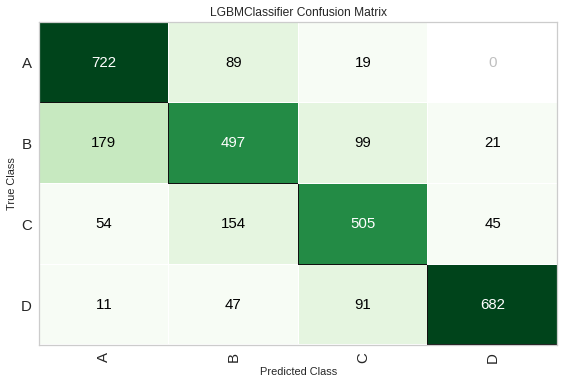

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
#confusion matric
plot_model(lightgbm, plot = 'confusion_matrix')

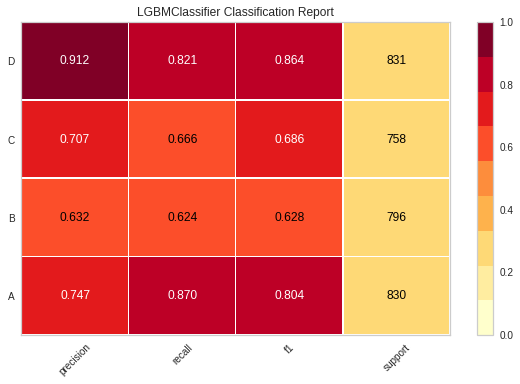

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [55]:
#classification report
plot_model(lightgbm, plot = 'class_report')

In [56]:
predict_model(lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.7484  0.9209  0.7453  0.7517  0.7481   

    Kappa     MCC  
0  0.6642  0.6654